#

In [2]:
import sklearn

print(sklearn.__version__)

# if sklearn.__version__ < '1.2.2':
#     %pip install --upgrade scikit-learn

1.2.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [14]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], 
                  [-0.4, 1.2]]
X = np.dot(X, transformation)

X.shape, y.shape

((1000, 2), (1000,))

training score : 0.995 (multinomial)


/tmp/ipykernel_4210/244274396.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


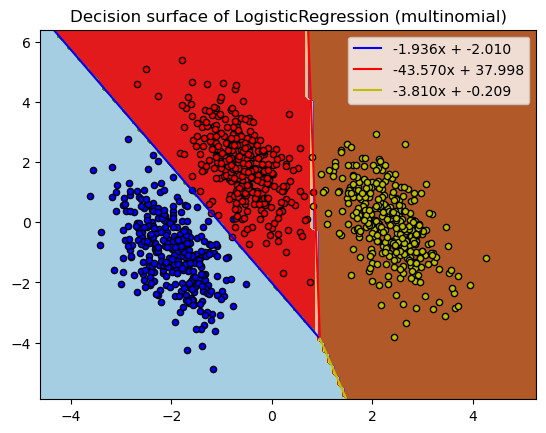

In [20]:
multi_class = "multinomial"
clf = LogisticRegression(
    solver="sag", max_iter=100, random_state=42, multi_class=multi_class
).fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis("tight")
# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20, 
    )
# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

# LU 분해로 가우시안 소거법 진행
from scipy.linalg import lu

L, U = lu(coef, permute_l=True)


y1 = -intercept[2] / L[2,0]
y2 = -intercept[1] - (L[1,0] * y1)

X2 = y2 / U[1,1]
X1 = (y1 - U[0,1] * X2) / U[0,0]

def plot_hyperplane(x1, x2, c, color):
    divider = coef[c, 1] - coef[(c + 1) % 3, 1]             # W_c_2 - W_c+1_2
    W = (coef[(c + 1) % 3, 0] - coef[c, 0]) / divider       # (W_c+1_1 - W_c_1) / W_c_2 - W_c+1_2
    b = (intercept[(c + 1) % 3] - intercept[c]) / divider   # (W_c+1_0 - W_c_0) / W_c_2 - W_c+1_2

    def line(x0):
        return W*x0 + b

    plt.plot([x1, x2], [line(x1), line(x2)], ls="-", color=color, label=f"{W:0.03f}x + {b:0.03f}")

for x1, x2, i, color in zip([xmin, xmin, X1],[X1, X1, xmax], clf.classes_, colors):
    plot_hyperplane(x1, x2, i, color)

plt.legend()
plt.show()